In [1]:
import pandas as pd

# Train
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Codification  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_excel('gameInfosTreated.xlsx')

df

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
1,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Fantasy
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
3,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Alternative
4,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Skateboarding
...,...,...,...,...,...,...,...,...,...,...
64558,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),Action Adventure
64559,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),General
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Miscellaneous
64561,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Party


In [3]:
#df = df[(df['metascore'] < 95) & (df['metascore'] > 70)]

In [4]:
df.sort_values('ratings_numbers').head(15)

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
36343,AERO THE ACRO-BAT,05/14/2002,Game Boy Advance,71,12,7.5,4,Atomic Planet Entertainment,1 Player,Platformer
20445,DISNEY GUILTY PARTY,08/26/2010,Wii,78,13,8.0,4,Wideload Games Inc.,No Online Multiplayer,Miscellaneous
45809,STONEFLY,06/01/2021,Switch,66,8,7.5,4,Flight School Studio,No Online Multiplayer,Action Adventure
45810,STONEFLY,06/01/2021,Switch,66,8,7.5,4,Flight School Studio,No Online Multiplayer,General
45897,PAC-MAN WORLD 2,10/15/2002,Xbox,66,7,7.5,4,Namco,1 Player,Action
45898,PAC-MAN WORLD 2,10/15/2002,Xbox,66,7,7.5,4,Namco,1 Player,Platformer
45899,PAC-MAN WORLD 2,10/15/2002,Xbox,66,7,7.5,4,Namco,1 Player,3D
45922,LOONEY TUNES: DUCK AMUCK,10/09/2007,DS,66,16,8.0,4,WayForward,2 Online,Action
45923,LOONEY TUNES: DUCK AMUCK,10/09/2007,DS,66,16,8.0,4,WayForward,2 Online,Miscellaneous
45924,LOONEY TUNES: DUCK AMUCK,10/09/2007,DS,66,16,8.0,4,WayForward,2 Online,General


In [5]:
df = df.drop(['release', 'players_number'], axis=1)

display(df)

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,Nintendo 64,99,22,9.1,7511,Nintendo,Action Adventure
1,THE LEGEND OF ZELDA: OCARINA OF TIME,Nintendo 64,99,22,9.1,7511,Nintendo,Fantasy
2,TONY HAWK'S PRO SKATER 2,PlayStation,98,19,7.4,869,Neversoft Entertainment,Sports
3,TONY HAWK'S PRO SKATER 2,PlayStation,98,19,7.4,869,Neversoft Entertainment,Alternative
4,TONY HAWK'S PRO SKATER 2,PlayStation,98,19,7.4,869,Neversoft Entertainment,Skateboarding
...,...,...,...,...,...,...,...,...
64558,RIDE TO HELL: RETRIBUTION,PC,16,9,1.4,609,Eutechnyx,Action Adventure
64559,RIDE TO HELL: RETRIBUTION,PC,16,9,1.4,609,Eutechnyx,General
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,Wii U,11,8,2.7,195,"Art Co., Ltd.",Miscellaneous
64561,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,Wii U,11,8,2.7,195,"Art Co., Ltd.",Party


## Codification

In [6]:
le_title = LabelEncoder()

# Aplicating the LabelEncoding in column "genre_split"
df['title'] = le_title.fit_transform(df['title'])

In [7]:
le_genre = LabelEncoder()

# Aplicating the LabelEncoding in column "genre_split"
df['genre_split'] = le_genre.fit_transform(df['genre_split'])

In [8]:
le_plat = LabelEncoder()

# Aplicating the LabelEncoding in column "plataform"
df['plataform'] = le_plat.fit_transform(df['plataform'])

In [9]:
le_developer = LabelEncoder()

# Aplicating the LabelEncoding in column "developer"
df['developer'] = le_developer.fit_transform(df['developer'])

In [10]:
df

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
0,10252,5,99,22,9.1,7511,2165,174
1,10252,5,99,22,9.1,7511,2165,44
2,10808,8,98,19,7.4,869,2132,224
3,10808,8,98,19,7.4,869,2132,8
4,10808,8,98,19,7.4,869,2132,124
...,...,...,...,...,...,...,...,...
64558,8068,6,16,9,1.4,609,1035,5
64559,8068,6,16,9,1.4,609,1035,56
64560,3370,17,11,8,2.7,195,211,204
64561,3370,17,11,8,2.7,195,211,100


### Convert to original format

In [11]:
#df['plataform'] = le_plat.inverse_transform(df['plataform'])
#df['developer'] = le_developer.inverse_transform(df['developer'])

In [12]:
df

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
0,10252,5,99,22,9.1,7511,2165,174
1,10252,5,99,22,9.1,7511,2165,44
2,10808,8,98,19,7.4,869,2132,224
3,10808,8,98,19,7.4,869,2132,8
4,10808,8,98,19,7.4,869,2132,124
...,...,...,...,...,...,...,...,...
64558,8068,6,16,9,1.4,609,1035,5
64559,8068,6,16,9,1.4,609,1035,56
64560,3370,17,11,8,2.7,195,211,204
64561,3370,17,11,8,2.7,195,211,100


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('metascore', axis=1), df['metascore'], test_size=0.30)

In [14]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [18]:
acc_dtc = accuracy_score(y_test, y_pred)

print('Acurácia:', round(acc_dtc,4))

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
display(cm)

Acurácia: 0.8908
Matriz de Confusão:


array([[ 2,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 18,  0,  0],
       [ 0,  0,  0, ...,  0, 19,  0],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int64)

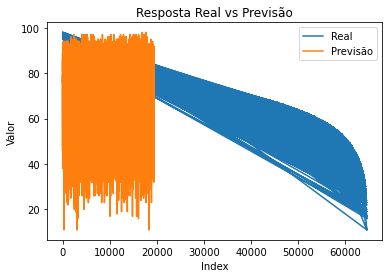

In [16]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Previsão')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Valor')
plt.title('Resposta Real vs Previsão')
plt.show()

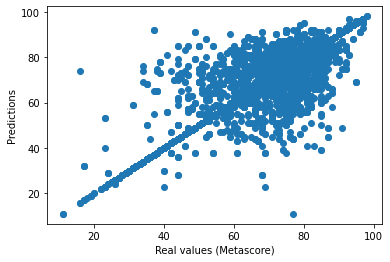

In [17]:
# Suponha que você tenha as seguintes variáveis:
# real_values: as respostas reais (notas do Metascore)
# predictions: as previsões feitas pelo modelo

plt.scatter(y_test, y_pred)
plt.xlabel("Real values (Metascore)")
plt.ylabel("Predictions")
plt.show()